## Importing common libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
input_data = pd.read_csv(filepath_or_buffer=r'./Social_Network_Ads.csv')
input_data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [3]:
X = input_data.drop(columns=['Purchased', 'User ID'])
y = input_data[['Purchased']]

## Categorical data encoding

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [5]:
onehot_encorder = OneHotEncoder(categories=[['Male','Female']],drop='first')
ct = ColumnTransformer(  [  ('encoder', onehot_encorder,  ['Gender'])  ],
                       remainder='passthrough')

In [6]:
X_onehot_encoded = ct.fit_transform(X[['Gender']])

In [7]:
onehot_cols = ["Gender_"+str(int(i)) for i in range(X_onehot_encoded.shape[1])]
df_onehot = pd.DataFrame(X_onehot_encoded, columns=onehot_cols)
df = pd.concat([X, df_onehot], axis=1)
X = df.drop(labels=['Gender'],axis=1)
X.head(3)

,Age,EstimatedSalary,Gender_0
0,19,19000,0.0
1,35,20000,0.0
2,26,43000,1.0


## Feature scaling input

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler_X = StandardScaler()
X = pd.DataFrame(columns=X.columns, data=scaler_X.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Fitting SVM to the Training set

In [12]:
from sklearn.svm import SVC

In [13]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [16]:
cm = confusion_matrix(y_test, y_pred)

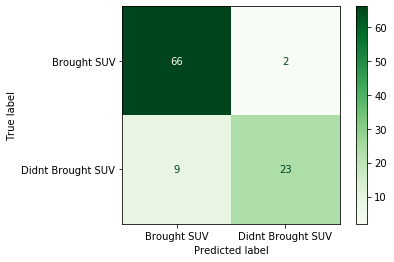

In [17]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Greens,
                            display_labels = ['Brought SUV', 'Didnt Brought SUV'])